># Text Classification Model For Classifying Hate Speech & Offensive Language.
>>##### By - Saif Ali Ahmad
<b>Discription about dataset </b> -  There’s no shortage of hate speech online. This text classification dataset features hate-speech gathered from Twitter. It has been classified as either containing hate-speech, only offensive language, or neither. Do note that this data contains offensive content, none of which we endorse outside of the value it presents to anyone training a model.<br><br>
Dataset Details : There are 24,782 Tweets.These Tweets are classified as Hate Speech, Offensive Language and Neither.<br><br> 
<b>Dataset is stored in CSV format. Details of data attributes are given below:</b><br><br>count = number of CrowdFlower users who coded each tweet (min is 3, sometimes more users coded a tweet when judgments were determined to be unreliable by CF).<br><br>hate_speech = number of CF users who judged the tweet to be hate speech.<br><br>offensive_language = number of CF users who judged the tweet to be offensive.<br><br>neither = number of CF users who judged the tweet to be neither offensive nor non-offensive.<br><br>class = class label for majority of CF users. 0 - hate speech 1 - offensive language 2 - neither<br><br>

>URL for data set - https://github.com/t-davidson/hate-speech-and-offensive-language/tree/master/data

In [1]:
# Importing important libraries
import pandas as pd
import numpy  as np
import os
import re
import nltk
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix,accuracy_score
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

In [2]:
# Changing the working directory
os.chdir("D:\\NLP\\Text Classification Model For Classifying Hate Speech & Offensive Language")
os.getcwd()

'D:\\NLP\\Text Classification Model For Classifying Hate Speech & Offensive Language'

In [3]:
# loading the dataset
data = pd.read_csv(filepath_or_buffer=r"Hate Speech & Offensive Language.csv")
data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [4]:
# displaying information about attributes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [5]:
# Dropping columns not relevant for text classification
data.drop(columns=['Unnamed: 0', 'count', 'hate_speech', 
                   'offensive_language', 'neither'],inplace =True)
# Renaming column "class" as "speech_class"
data.rename(columns = {'class': 'speech_class'},inplace=True)
data.head()

,speech_class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [6]:
# Defining dictionary for mapping speech_class
class_dict = {0: "hate_speech", 1:"offensive_language", 2: "neither"}

In [7]:
# Mapping speech_class labels using class_dict
data['speech_class'] = data['speech_class'].map(class_dict)
data.head()

,speech_class,tweet
0,neither,!!! RT @mayasolovely: As a woman you shouldn't...
1,offensive_language,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,offensive_language,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,offensive_language,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,offensive_language,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


>## Creating Function For Pre-processing the Tweets

In [8]:
# Creating function for pre-processing the tweets using Regular Expressions

def processing_tweets(tweet):
    tweet = re.sub(r'"','',tweet)
    tweet = re.sub(r'\sRT\s','',tweet)
    
    tweet = re.sub(r"^https://t.co/[a-zA-Z0-9]*\s", " ", tweet)
    tweet = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*\s", " ", tweet)
    tweet = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*$", " ", tweet)
    tweet = re.sub(r"^http://t.co/[a-zA-Z0-9]*\s", " ", tweet)
    tweet = re.sub(r"\s+http://t.co/[a-zA-Z0-9]*\s", " ", tweet)
    tweet = re.sub(r"\s+http://t.co/[a-zA-Z0-9]*$", " ", tweet)
    
    tweet = re.sub("@[A-Za-z0-9_:]+"," ", tweet)
    tweet = re.sub("#[A-Za-z0-9_:]+"," ", tweet)
    
    tweet = tweet.lower()
    tweet = re.sub(r"that's","that is",tweet)
    tweet = re.sub(r"there's","there is",tweet)
    tweet = re.sub(r"what's","what is",tweet)
    tweet = re.sub(r"where's","where is",tweet)
    tweet = re.sub(r"it's","it is",tweet)
    tweet = re.sub(r"who's","who is",tweet)
    tweet = re.sub(r"i'm","i am",tweet)
    tweet = re.sub(r"she's","she is",tweet)
    tweet = re.sub(r"he's","he is",tweet)
    tweet = re.sub(r"they're","they are",tweet)
    tweet = re.sub(r"who're","who are",tweet)
    tweet = re.sub(r"ain't","am not",tweet)
    tweet = re.sub(r"aint","am not",tweet)
    tweet = re.sub(r"wouldn't","would not",tweet)
    tweet = re.sub(r"shouldn't","should not",tweet)
    tweet = re.sub(r"can't","can not",tweet)
    tweet = re.sub(r"don't","do not",tweet)
    tweet = re.sub(r"didn't","did not",tweet)
    tweet = re.sub(r"couldn't","could not",tweet)
    tweet = re.sub(r"won't","will not",tweet)
    tweet = re.sub(r"\W"," ",tweet)
    tweet = re.sub(r"\d"," ",tweet)
    tweet = re.sub(r"\s+[a-z]\s+"," ",tweet)
    tweet = re.sub(r"\s+[a-z]$"," ",tweet)
    tweet = re.sub(r"^[a-z]\s+"," ",tweet)
    tweet = re.sub(r"\s+"," ",tweet)
    
    return tweet

>## Pre-processing the Tweets

In [9]:
# applying the the function processing_tweets on tweets
for i in range(data.shape[0]):
    data.iloc[i,1] = processing_tweets(data.iloc[i,1]) 

In [10]:
data.head(10)

,speech_class,tweet
0,neither,as woman you should not complain about cleani...
1,offensive_language,boy dats cold tyga dwn bad for cuffin dat hoe...
2,offensive_language,dawg you ever fuck bitch and she start to cry...
3,offensive_language,she look like tranny
4,offensive_language,the shit you hear about me might be true or i...
5,offensive_language,the shit just blows me claim you so faithful ...
6,offensive_language,can not just sit up and hate on another bitch...
7,offensive_language,cause am tired of you big bitches coming for ...
8,offensive_language,amp you might not get ya bitch back amp thats...
9,offensive_language,hobbies include fighting mariam bitch


> ## Removing Class-Imbalanced Problem

In [11]:
# There is a class imbalance as shown below
data['speech_class'].value_counts()

offensive_language    19190
neither                4163
hate_speech            1430
Name: speech_class, dtype: int64

In [12]:
# Isolating Majority Class and Minority Class
majority = data[data.speech_class == 'offensive_language']
minority = data[data.speech_class =='hate_speech']
balanced = data[data.speech_class =='neither']

In [13]:
# Downsampling majority class
majority_downsampled = resample(majority, replace=False, n_samples=4000,random_state=42)
# Upsampling minority class
minority_upsampled = resample(minority, replace=True,n_samples=4000,random_state=42)

In [14]:
# Combine upsampled minority class with downsampled majority class
balanced_data = pd.concat([balanced,majority_downsampled,minority_upsampled])
# Resetting Index of Balanced classs
balanced_data.reset_index(inplace=True,drop=True)

In [15]:
balanced_data['speech_class'].value_counts()

neither               4163
offensive_language    4000
hate_speech           4000
Name: speech_class, dtype: int64

> ## Creating TF-IDF Vectorizer

In [16]:
# Isolating tweets from balanced_data dataset
corpus = balanced_data['tweet']

In [17]:
# Importing Corpus of Stopwords from nltk
from nltk.corpus import stopwords

In [18]:
# Creating the Tf-Idf model
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features = 2000, min_df = 3, max_df = 0.6, stop_words = stopwords.words('english'))

In [19]:
X_text = vectorizer.fit_transform(corpus).toarray()

In [20]:
y_text = np.asarray(balanced_data['speech_class'])

> ## Creating Training & Testing Datasets

In [21]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# Shuffling the dataset
X , y = shuffle(X_text , y_text , random_state = 1)
# creating train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

> ## Logistic Regression Classifier

In [22]:
# Training the Logistic Regression classifier
from sklearn.linear_model import LogisticRegression
logistic_classifier = LogisticRegression(penalty='l2',max_iter=200,solver='lbfgs', multi_class='auto')
logistic_classifier.fit(X_train,y_train)

LogisticRegression(max_iter=200)

In [23]:
# Predicting on test set with Logistic Model
log_y_pred = logistic_classifier.predict(X_test)

> #### Logistic Model Performance

In [24]:
# Accuracy of Logistic Model on Test set
log_accuracy = accuracy_score(y_test, log_y_pred)
print("\nAccuracy Of Logistic Classifier : %.2f"%(log_accuracy*100)+'%\n')


Accuracy Of Logistic Classifier : 87.30%



In [25]:
# Confusion Matrix for Logistic Model
log_cm = confusion_matrix(y_test, log_y_pred)

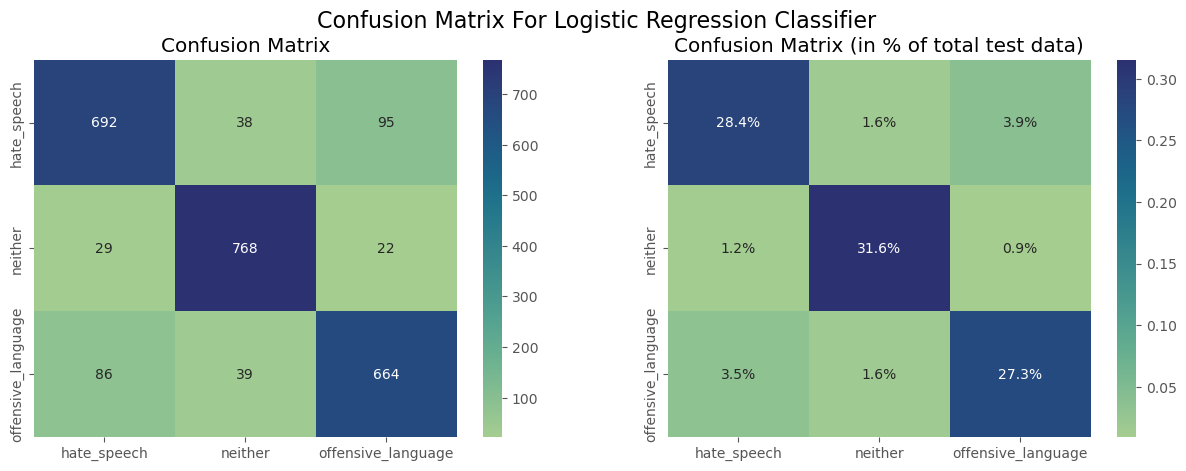

In [26]:
# Plotting the Confusion Matrix for Logistic Model 

fig,axis = plt.subplots(nrows =1,ncols= 2,figsize=(15,5),dpi=100)

sns.heatmap(data=log_cm,annot=True,fmt='',cmap='crest',xticklabels=logistic_classifier.classes_,
            yticklabels=logistic_classifier.classes_, ax = axis[0])
axis[0].set_title('Confusion Matrix')

sns.heatmap(data=log_cm/np.sum(log_cm),annot=True,fmt='.1%',cmap='crest',xticklabels=logistic_classifier.classes_,
            yticklabels=logistic_classifier.classes_, ax = axis[1])
axis[1].set_title("Confusion Matrix (in % of total test data)")

fig.suptitle("Confusion Matrix For Logistic Regression Classifier", fontsize=16)
plt.show()

> ## Random Forest Classifier

In [27]:
# Training the Random Forest Classification Model on Training set
from sklearn.ensemble import RandomForestClassifier
RF_classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)
RF_classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=0)

In [28]:
# Predicting on test set with Random Forest Model
RF_y_pred = RF_classifier.predict(X_test)

> #### Random Forest Model Performance

In [29]:
# Accuracy of Random Forest Model on Test set
RF_accuracy = accuracy_score(y_test, RF_y_pred)
print("\nAccuracy Of Random Forest Classifier : %.2f"%(RF_accuracy*100)+'%\n')


Accuracy Of Random Forest Classifier : 93.34%



In [30]:
# Confusion Matrix for Random Forest Model
RF_cm = confusion_matrix(y_test, RF_y_pred)

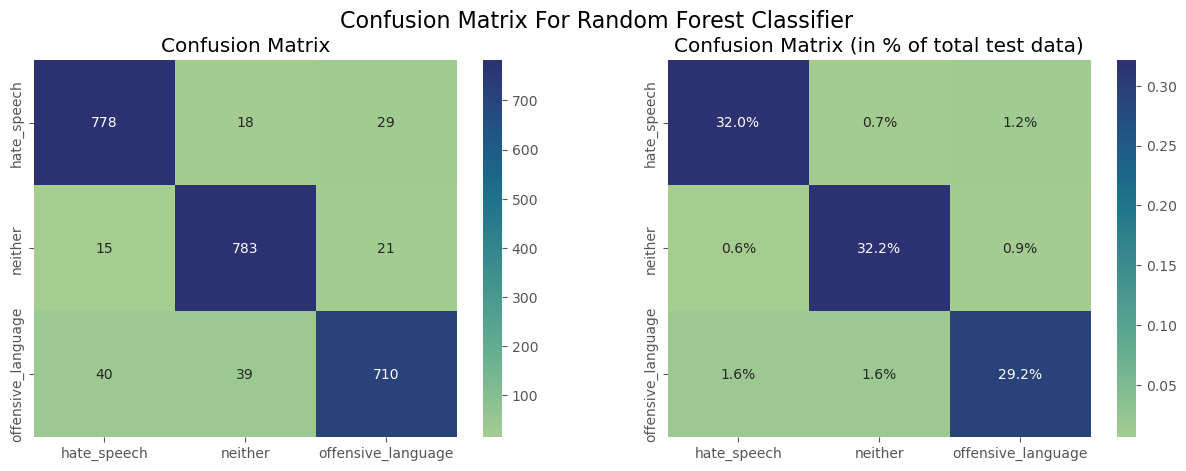

In [31]:
# Plotting the Confusion Matrix for Random Forest Model

fig,axis = plt.subplots(nrows =1,ncols= 2,figsize=(15,5),dpi=100)

sns.heatmap(data=RF_cm,annot=True,fmt='',cmap='crest',xticklabels=RF_classifier.classes_,
            yticklabels=RF_classifier.classes_, ax = axis[0])
axis[0].set_title('Confusion Matrix')

sns.heatmap(data=RF_cm/np.sum(RF_cm),annot=True,fmt='.1%',cmap='crest',xticklabels=RF_classifier.classes_,
            yticklabels=RF_classifier.classes_, ax = axis[1])
axis[1].set_title("Confusion Matrix (in % of total test data)")

fig.suptitle('Confusion Matrix For Random Forest Classifier', fontsize=16)
plt.show()

> ## Saving the Trained Models

In [32]:
# Importing pickle
import pickle

> #### Pickling the TF-IDF Vectorizer

In [33]:
# saving tf-idf model
with open('tf-idf-model.pickle','wb') as f:
    pickle.dump(vectorizer,f)

> #### Pickling the Logistic Classifier

In [34]:
# saving logistic classifier
with open('Logistic-Classifier.pickle','wb') as f:
    pickle.dump(logistic_classifier,f)

> #### Pickling the Random Forest Classifier

In [35]:
# saving Random Forest classifier
with open('RandomForest-Classifier.pickle','wb') as f:
    pickle.dump(RF_classifier,f)

## Conclusion
> We build a Text Classification Model for the Hate Speech and Offensive Language Dataset.The Raw tweets were processed through Regular Expressions. There was Class Imbalance issue present in the dataset wich was addressed through Upsampling and Downsampling Techniques.<br>
Afterwards, TF-IDF vectorizer model was created, the output of TF-IDF vectorizer is then feed into the Logistic Model and Random Forest Model. Performance of both the models is then compared through metrics like Accuracy and Confusion Matrix. Random Forest Model was found to have Highest Accuracy of 93.34% while Logistic Model had accuracy of 87.30% . <br>
In the end we saved the trained models as pickle files for future classification purpose.